## Regression between atmospheric contribution to SLH and SST using observational data



In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Documents/Wind effect/Thesis-KNMI/SST/code')

import import_data as imprt
import regression as regr
import figures as fig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import and plot wind contribution to sea level data

The annual data has been detrended

In [69]:
df_era5, df_20cr = imprt.import_obs_ac_slh_data()


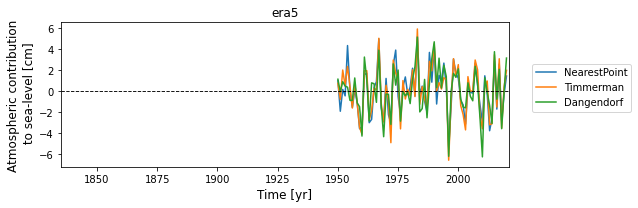

In [70]:
fig.plot_df_timeseries(df_era5, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')


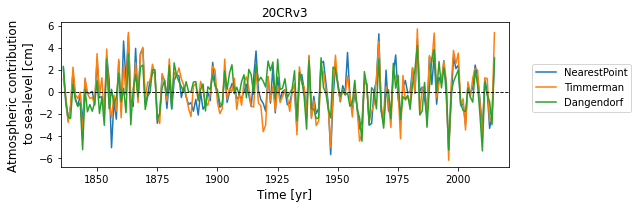

In [71]:
fig.plot_df_timeseries(df_20cr, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')



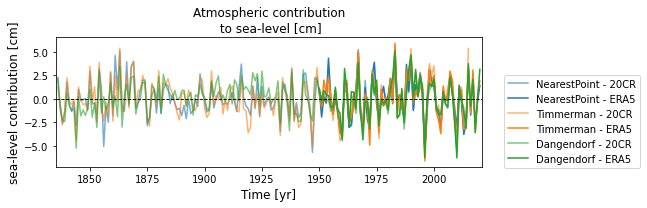

In [72]:
fig.plot_era5_20cr_timeseries(df_era5, df_20cr)

### Import and plot SST data

There are two observational SST products: SST and SKT 


SST: sea surface temperature (NOAA Extended Reconstructed Sea Surface Temperature (SST) V5)

SKT: skin temperature? (NOAA-CIRES-DOE Twentieth Century Reanalysis (V3))

In [73]:
da_sst, da_skt = imprt.import_obs_sst_data()

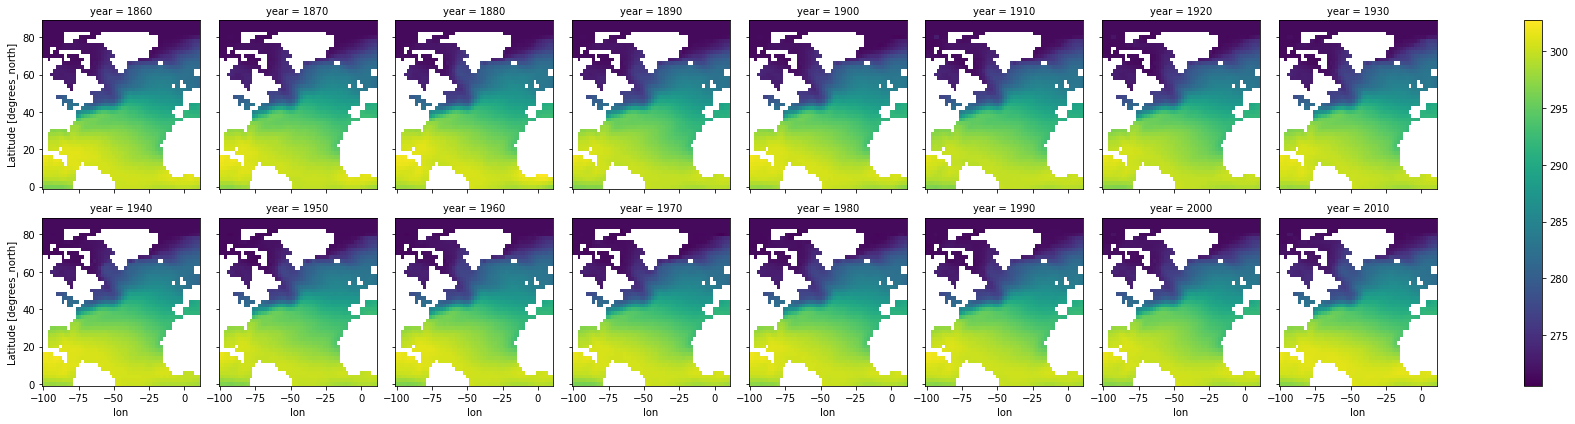

In [74]:
years = range(1860, 2020, 10)
da_sst.where(da_sst.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

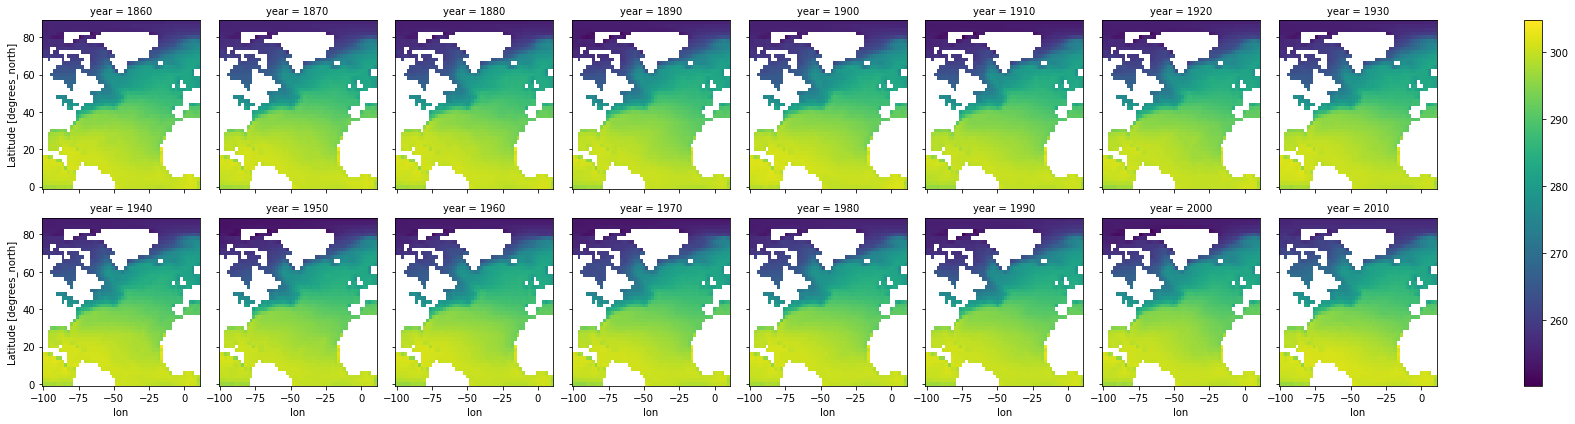

In [75]:
years = range(1860, 2020, 10)
da_skt.where(da_skt.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

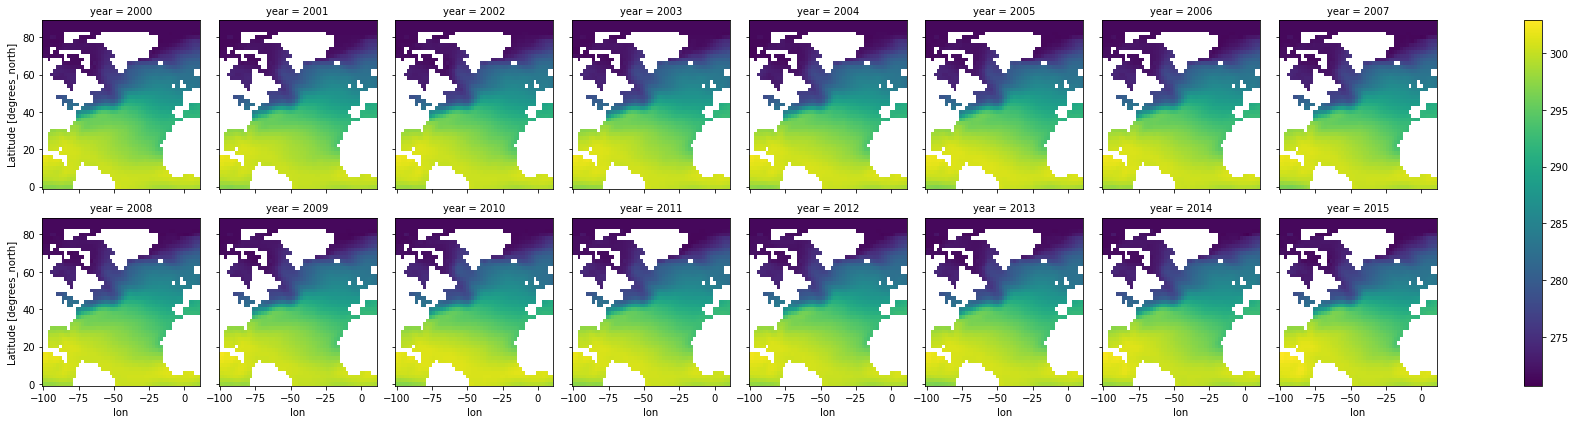

In [76]:
years = range(2000, 2020)
da_sst.where(da_sst.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

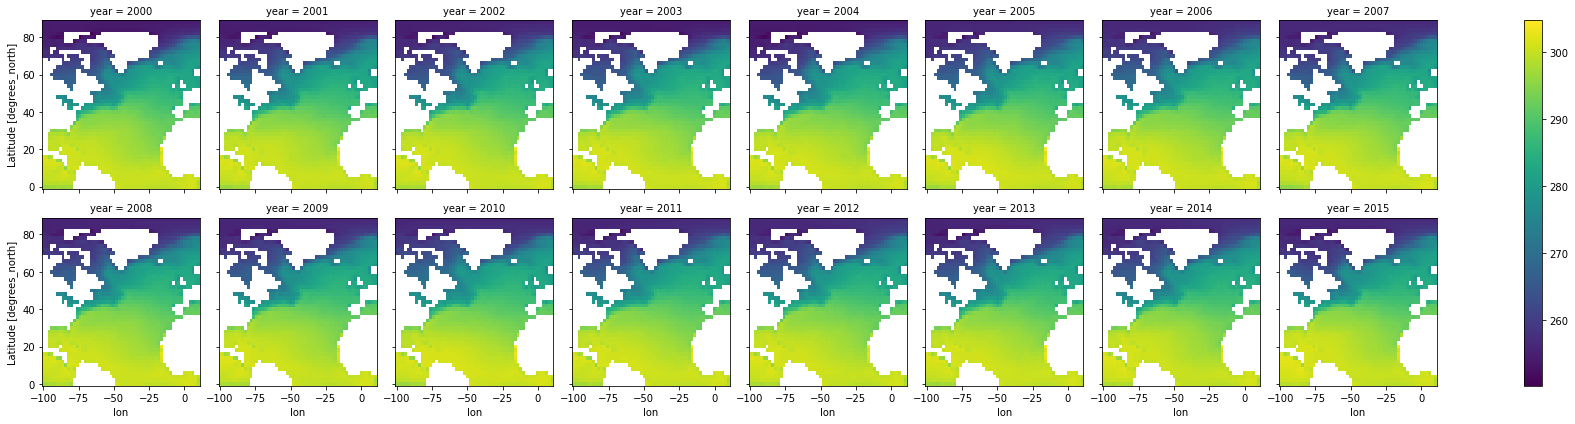

In [77]:
years = range(2000, 2020)
da_skt.where(da_skt.year.isin(years), drop = True).plot(col = 'year', col_wrap = 8)

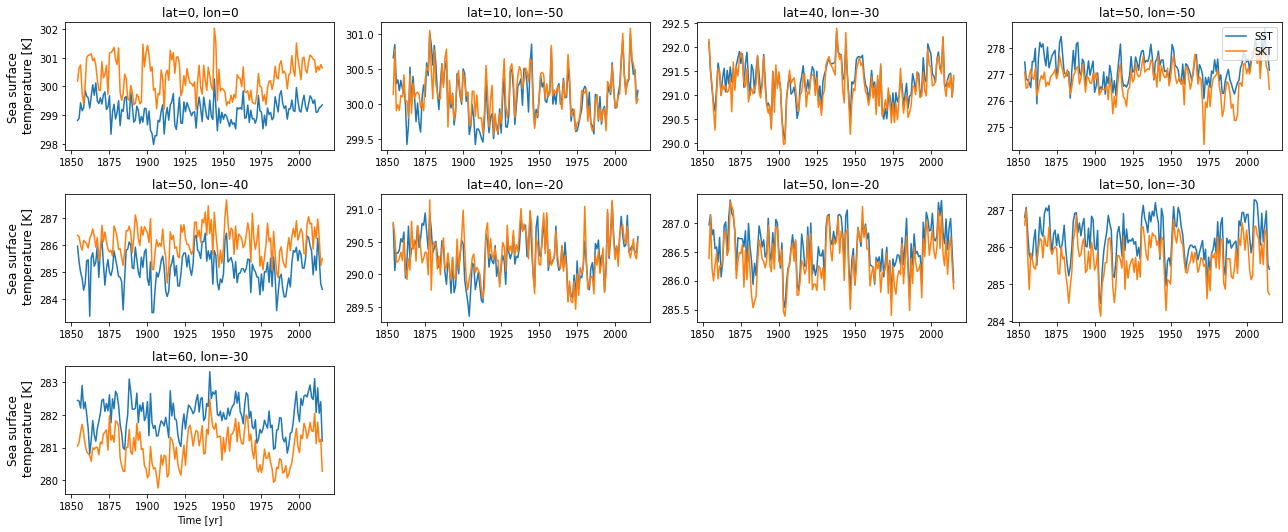

In [78]:
locations = [[0,0], [10,-50], [40,-30], [50,-50], [50, -40], [40, -20], [50, -20], [50, -30], [60, -30]]

fig.plot_sst_timeseries(da_sst, da_skt, locations, name = '')

### Perform regression for 31y window


A lagged regression is performed between each SST time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 31 y window

In [5]:
df_era5_31, df_20cr_31 = imprt.import_obs_ac_slh_data(smoothed = True)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/observations/Regression results/fullperiod/timeseries_NearestPoint_era5.csv'

In [80]:
da_sst_31, da_skt_31 = imprt.import_obs_sst_data(smoothed = True)

/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Plot regression input

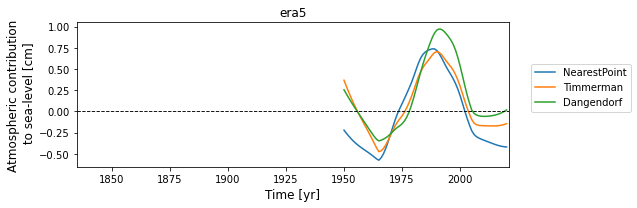

In [81]:
fig.plot_df_timeseries(df_era5_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')


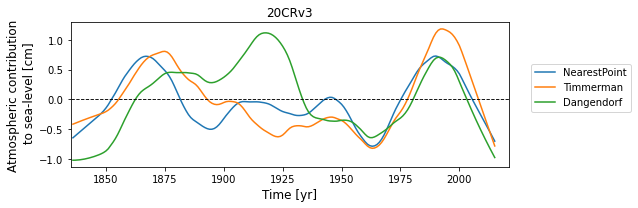

In [82]:
fig.plot_df_timeseries(df_20cr_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')



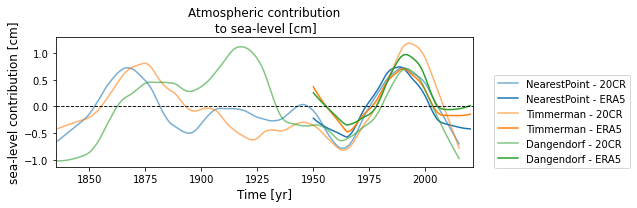

In [83]:
fig.plot_era5_20cr_timeseries(df_era5_31, df_20cr_31)

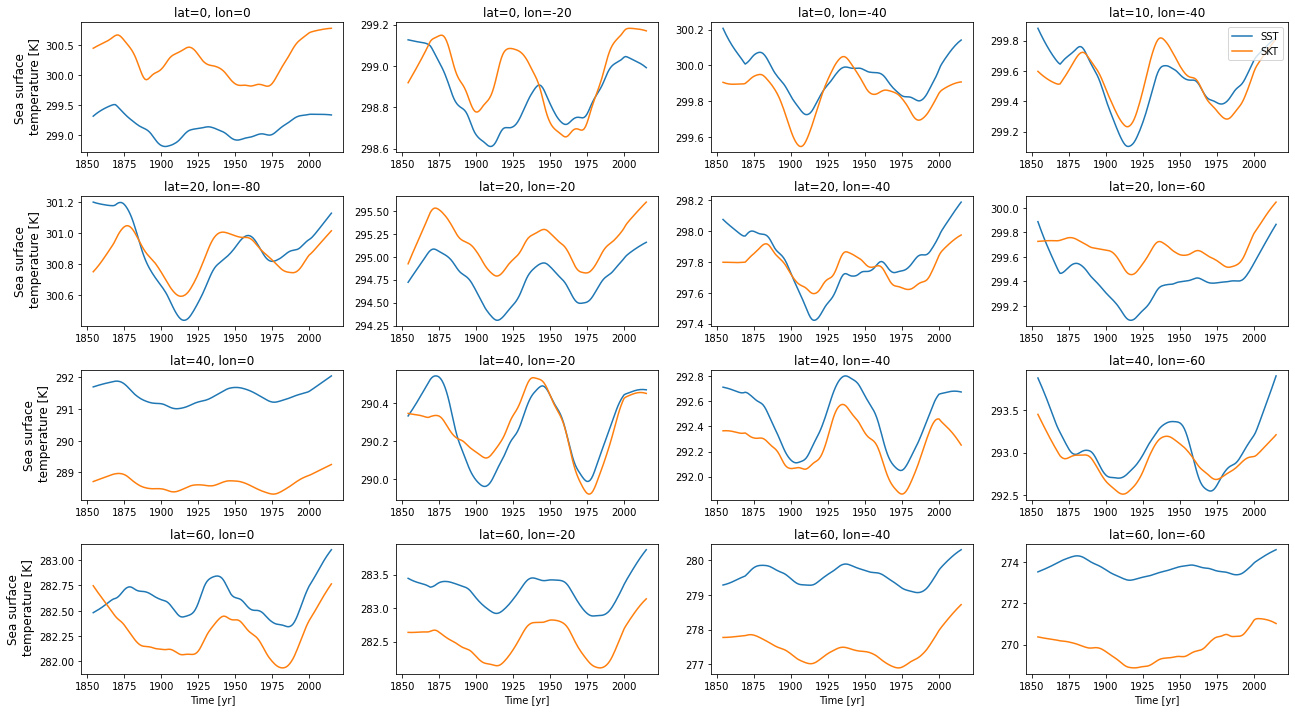

In [84]:
locations = [[0,0], [0,-20], [0,-40], [10,-40], 
             [20,-80], [20,-20], [20,-40], [20,-60],
             [40,0], [40,-20], [40,-40], [40,-60],
            [60,0], [60,-20], [60,-40], [60,-60]]

fig.plot_sst_timeseries(da_sst_31, da_skt_31, locations, name = '')

#### Perform regression SST
The regression is performed between the 20cr and era5 atmospheric contribution to sea level data and sst and skt products for each grid point of sst and skt data

In [1]:
df_era5_31

NameError: name 'df_era5_31' is not defined

In [85]:
results_sst_era5_31, timeseries_sst_era5_31 = regr.lagged_regression(da_sst_31, df_era5_31)

In [86]:
results_sst_20cr_31, timeseries_sst_20cr_31 = regr.lagged_regression(da_sst_31, df_20cr_31)

#### Create plots for report

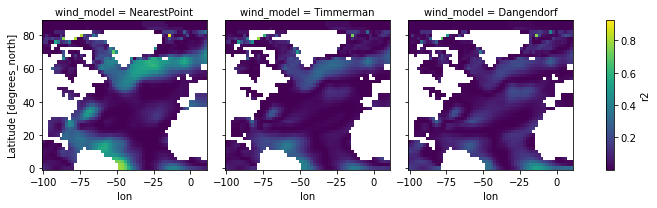

In [87]:
results_sst_era5_31.sel(lag = 0).r2.plot(col = 'wind_model')

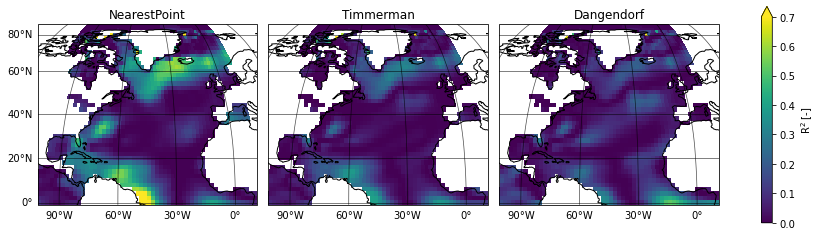

In [103]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_era5_31.r2.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 vmin = 0.0, vmax = 0.7, col='wind_model', col_wrap=3,  # multiplot settings
                 aspect=results_sst_era5_31.dims['lon'] / results_sst_era5_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':'R$^2$ [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SST_r2_era5.png', 
            bbox_inches='tight', dpi = 500)  

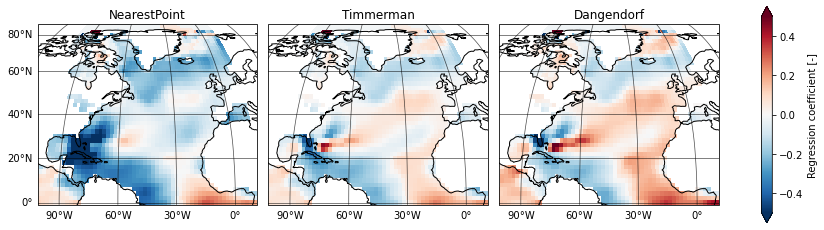

In [104]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_era5_31.reg_coef.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 col='wind_model', col_wrap=3,  # multiplot settings
                vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r',
                 aspect=results_sst_era5_31.dims['lon'] / results_sst_era5_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':r'Regression coefficient [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SST_reg_coef_era5.png', 
            bbox_inches='tight', dpi = 500)  

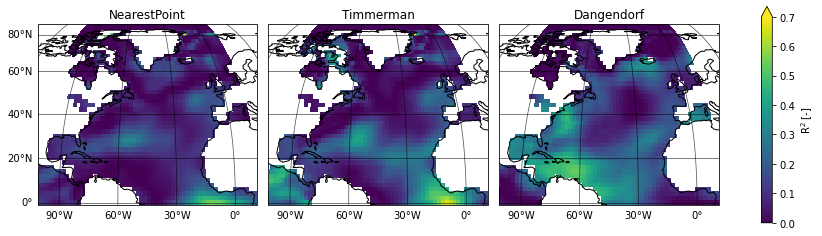

In [105]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_20cr_31.r2.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 vmin = 0.0, vmax = 0.7, col='wind_model', col_wrap=3,  # multiplot settings
                 aspect=results_sst_20cr_31.dims['lon'] / results_sst_20cr_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':'R$^2$ [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
            
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SST_r2_20cr.png', 
            bbox_inches='tight', dpi = 500)     

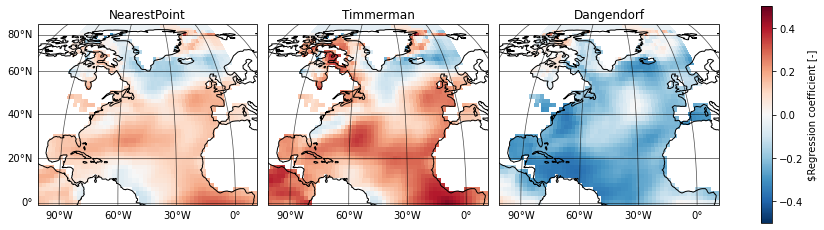

In [106]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_sst_20cr_31.reg_coef.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 col='wind_model', col_wrap=3,  # multiplot settings
                vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r',
                 aspect=results_sst_20cr_31.dims['lon'] / results_sst_20cr_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':r'$Regression coefficient [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SST_reg_coef_20cr.png', 
            bbox_inches='tight', dpi = 500)  

#### Perform regression SKT
The regression is performed between the 20cr and era5 atmospheric contribution to sea level data and sst and skt products for each grid point of sst and skt data

In [92]:
results_skt_era5_31, timeseries_skt_era5_31 = regr.lagged_regression(da_skt_31, df_era5_31)

In [93]:
results_skt_20cr_31, timeseries_skt_20cr_31 = regr.lagged_regression(da_skt_31, df_20cr_31)

#### Create plots for report

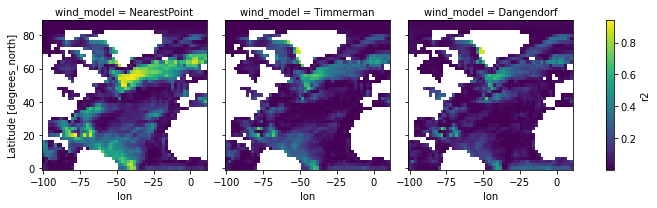

In [94]:
results_skt_era5_31.sel(lag = 0).r2.plot(col = 'wind_model')

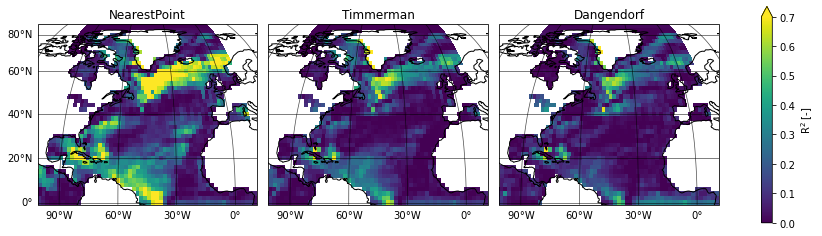

In [107]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_skt_era5_31.r2.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 vmin = 0.0, vmax = 0.7, col='wind_model', col_wrap=3,  # multiplot settings
                 aspect=results_skt_era5_31.dims['lon'] / results_skt_era5_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':'R$^2$ [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SKT/SST_r2_era5.png', 
            bbox_inches='tight', dpi = 500)  

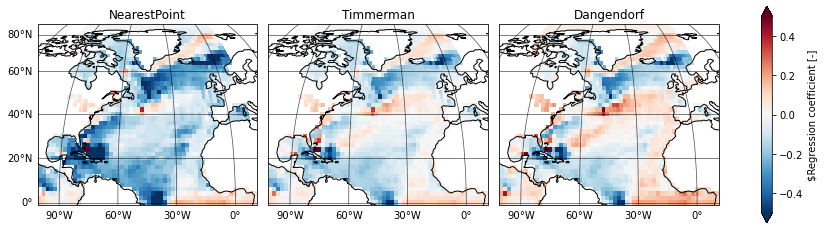

In [108]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_skt_era5_31.reg_coef.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 col='wind_model', col_wrap=3,  # multiplot settings
                vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r',
                 aspect=results_skt_era5_31.dims['lon'] / results_skt_era5_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':r'$Regression coefficient [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SKT/SST_reg_coef_era5.png', 
            bbox_inches='tight', dpi = 500)  

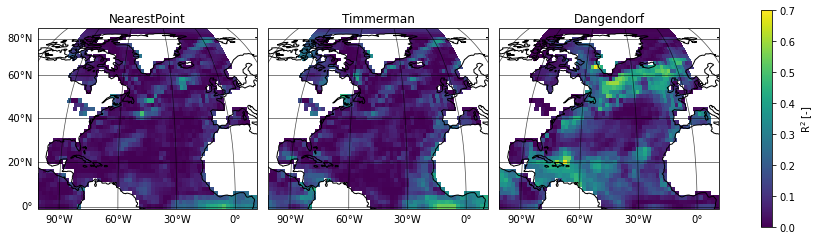

In [109]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_skt_20cr_31.r2.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 vmin = 0.0, vmax = 0.7, col='wind_model', col_wrap=3,  # multiplot settings
                 aspect=results_skt_20cr_31.dims['lon'] / results_skt_20cr_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':'R$^2$ [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
            
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SKT/SST_r2_20cr.png', 
            bbox_inches='tight', dpi = 500)     

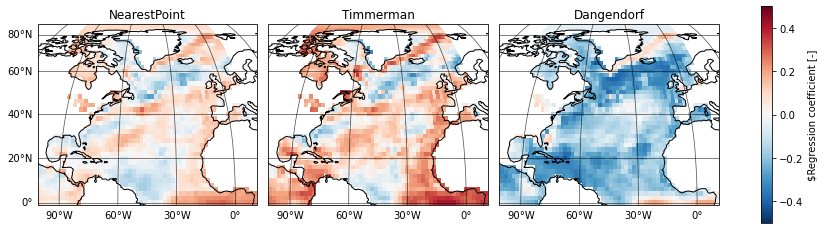

In [110]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
wind_models = ['NearestPoint', 'Timmerman', 'Dangendorf']

map_proj = ccrs.Robinson(central_longitude=-45)

p = results_skt_20cr_31.reg_coef.sel(lag=0).plot(transform=ccrs.PlateCarree(),  # the data's projection
                 col='wind_model', col_wrap=3,  # multiplot settings
                vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r',
                 aspect=results_skt_20cr_31.dims['lon'] / results_skt_20cr_31.dims['lat'],  # for a sensible figsize
                 subplot_kws={'projection': map_proj},# the plot's projection
                cbar_kwargs = {'orientation':'vertical', 'shrink':1.2, 'label':r'$Regression coefficient [-]'}
                                          )  
# We have to set the map's options on all four axes
for k, ax in enumerate(p.axes.flat):
    ax.coastlines(resolution = '110m')
    ax.set_title(wind_models[k])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = .7, color='k', alpha = .7)
    gl.top_labels = False
    gl.right_labels = False
    if k>0:
        gl.left_labels = False
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/SST/SKT/SST_reg_coef_20cr.png', 
            bbox_inches='tight', dpi = 500)  